In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpwZ9rx3\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
        binary source needs_compilation
missMDA   1.16   1.17             FALSE



installing the source package 'missMDA'


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpwZ9rx3\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpwZ9rx3\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [2]:
ionomics <- read.csv('geneva_z_transformed.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics = ionomics[0:200,]
ionomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [4]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 0.975

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
    1     2     3     4     5     6     7     8 
0.075 0.050 0.125 0.125 0.050 0.375 0.175 0.025 

Group means:
          B11       Na23       Mg26        Al27        P31         S34
1 -0.02963193  1.4210514 -0.1939046  0.48643403 -0.3644108 -0.47498381
2 -0.46041759 -1.2456771 -0.2894536 -0.58132392 -0.8394436 -0.67817602
3 -0.58289360 -0.6557355 -0.6301994  0.04565049  0.3398555  1.52429834
4 -0.23455798 -0.1261296  0.9280087  0.66048400 -0.1157965 -0.11791288
5 -1.47053474  0.2537228 -0.2365535  0.05399644  2.4945889  0.12334844
6  0.48724908 -0.1935301 -0.3306018  0.05187806 -0.0432380  0.02897809
7  0.25355249 -0.2909705  0.4893211 -0.56309374 -0.1025611 -0.74952031
8 -0.67476076 -0.3869477  0.7801425  0.41923517 -0.6673306  1.37006533
          K39        Ca44        Fe54       Mn55       Co59        Ni60
1 -0.31106910  0.09822832 -0.67074166  0.5850467  0.1993141 -0.22774030
2 -0.74810931 -0.05845702 -

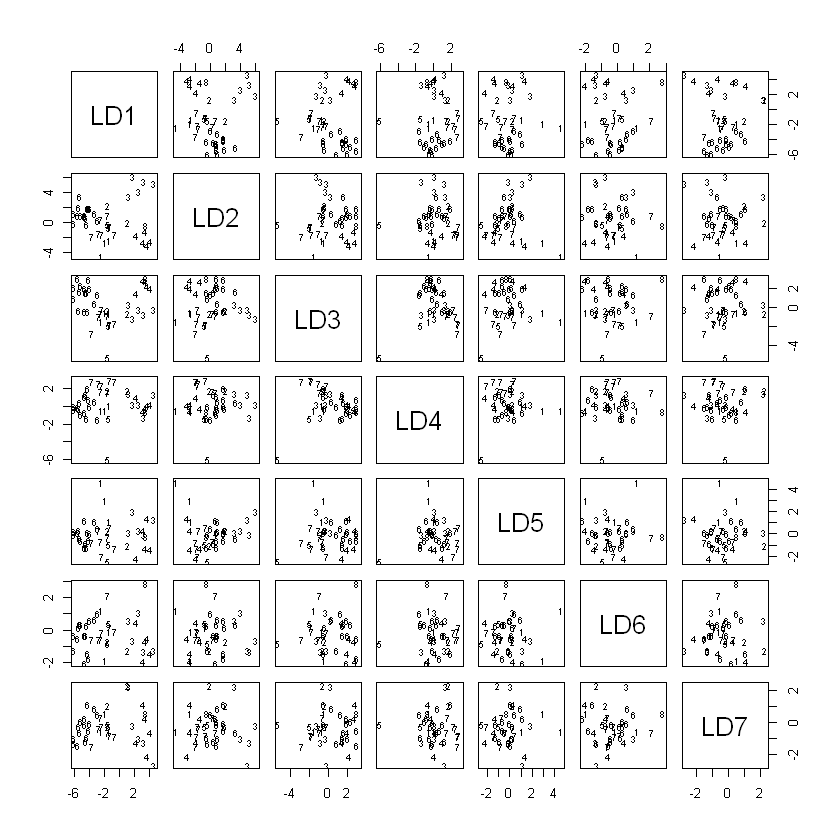

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 2 2 3
Levels: 1 2 3 4 5 6 7 8

,1,2,3,4,5,6,7,8
1,1.000000e+00,3.991394e-16,6.314113e-28,1.906556e-17,9.723261e-16,1.365641e-13,8.007322e-10,6.341077e-22
7,9.495396e-01,1.637874e-05,4.778130e-15,3.517182e-07,9.756470e-08,1.769107e-05,5.042584e-02,1.705055e-12
9,9.999960e-01,7.169719e-08,1.088967e-18,6.886957e-11,3.495499e-11,1.498067e-07,3.750912e-06,3.640119e-18
14,5.933699e-09,9.798081e-01,6.731927e-06,9.053147e-12,1.266359e-11,4.389711e-03,1.579546e-02,5.128900e-14
15,5.219203e-10,9.996004e-01,4.136268e-08,1.089573e-05,1.294186e-11,4.496568e-10,3.886428e-04,5.085425e-10
23,3.785773e-22,6.447997e-09,1.000000e+00,1.454780e-19,2.847101e-19,6.766990e-16,8.320509e-16,2.340645e-18


,LD1,LD2,LD3,LD4,LD5,LD6,LD7
1,-1.0184819,-4.897399,-1.8076510,-0.8358601,4.684930,1.467282,-0.2651436
7,0.0412032,-2.887429,-0.9834701,-0.2965233,1.153184,0.152675,-0.2974249
9,-0.4735273,-3.045889,-0.8173878,-0.8733949,3.016341,-1.630625,0.8262442


In [7]:
predmodel.test.lda = predict(model, data=test.data)
table <- table(Predicted=predmodel.test.lda$class, Species=train.data$spec_as_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

         Species
Predicted  1  2  3  4  5  6  7  8
        1  3  0  0  0  0  0  0  0
        2  0  2  1  0  0  0  0  0
        3  0  0  4  0  0  0  0  0
        4  0  0  0  5  0  0  0  0
        5  0  0  0  0  2  0  0  0
        6  0  0  0  0  0 15  0  0
        7  0  0  0  0  0  0  7  0
        8  0  0  0  0  0  0  0  1

Overall Statistics
                                          
               Accuracy : 0.975           
                 95% CI : (0.8684, 0.9994)
    No Information Rate : 0.375           
    P-Value [Acc > NIR] : 6.189e-16       
                                          
                  Kappa : 0.9683          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity             1.000   1.0000   0.8000    1.000     1.00    1.000
Specificity             1.000   0.9737   1.0000    1.000     1.0